# **Gestión de Datos**

## Práctica 1: Exploración Gráfica de Datos

*Autores: Pablo López Perez y Daniel Beteta Francisco*

## **0. Librerías utilizadas**

In [ ]:
install.packages('tidyverse')
install.packages('gplots')
install.packages('qgraph')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘RcppEigen’, ‘interp’, ‘checkmate’, ‘htmlwidgets’, ‘mnormt’, ‘pbivnorm’, ‘numDeriv’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Rcpp’, ‘psych’, ‘lavaan’, ‘plyr’, ‘Hmisc’, ‘igraph’, ‘jpeg’, ‘png’, ‘corpcor’, ‘reshape2’, ‘glasso’, ‘fdrtool’, ‘pbapply’, ‘abind’




In [ ]:
library(tidyverse)
library(gplots)
library(qgraph)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




## **1. Carga de datos**

In [ ]:
data <- read.csv("http://cardsorting.net/tutorials/25.csv")

head(data)

,Uniqid,Category,Startdate,Starttime,Endtime,QID,Carrots,Apple,Banana,Bread,⋯,Rice,Salmon,Soda,Spaghetti,Steak,Waffle,Water,Watermelon,Yogurt,Comment
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,2249,Sides,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,1,⋯,1,0,0,0,0,0,0,0,0,NA
2,2249,meat,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,⋯,0,1,0,0,1,0,0,0,0,NA
3,2249,dinners,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,NA
4,2249,Snacks,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,NA
5,2249,breakfasat,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,NA
6,2249,Fruit and veggie,10/8/2014,13:09:10,13:13:10,A1Q77WXLOKP6T,1,1,1,0,⋯,0,0,0,0,0,0,0,1,0,NA


Se cargan los datos de la dirección web suministrada y se muestran las primeras filas para un primer análisis y entendimiento del problema. 

## **2. Transformación básica de datos**

In [ ]:
category_target_data <- data[-c(1, 3:6, 47)]

head(category_target_data)

,Category,Carrots,Apple,Banana,Bread,Broccoli,Butter,Cake,Cereal,Cheese,⋯,Pretzels,Rice,Salmon,Soda,Spaghetti,Steak,Waffle,Water,Watermelon,Yogurt
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Sides,0,0,0,1,0,1,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
2,meat,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,1,0,0,0,0
3,dinners,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
4,Snacks,0,0,0,0,0,0,1,0,1,⋯,1,0,0,0,0,0,0,0,0,1
5,breakfasat,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,1,0,0,0
6,Fruit and veggie,1,1,1,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


Se han eliminado las columnas:
- Uniquid
- Startdate
- Starttime
- Endtime
- QID
- Comment

Ya que estas no son relevantes para el análisis a realizar. Nótese que no se ha eliminado la columna no númerica "Category" para un mayor entendimiento de la dinámica del Card Sorting, pero que posteriormente se eliminará para realizar las representaciones gráficas.

## **3. Frecuencia de aparición de los datos**

In [ ]:
sum_per_target <- c()
target_data <- category_target_data[-c(1)]

for(col_name in colnames(target_data)){
  sum_list <- summarise(target_data, sum=sum(target_data[col_name]))
  sum_per_target <- c(sum_per_target, sum_list$sum)
}

frequency_appearence_data <- data.frame(Target=colnames(target_data), Frequency=sum_per_target)

head(frequency_appearence_data)

,Target,Frequency
,<chr>,<int>
1,Carrots,23
2,Apple,23
3,Banana,24
4,Bread,23
5,Broccoli,23
6,Butter,23


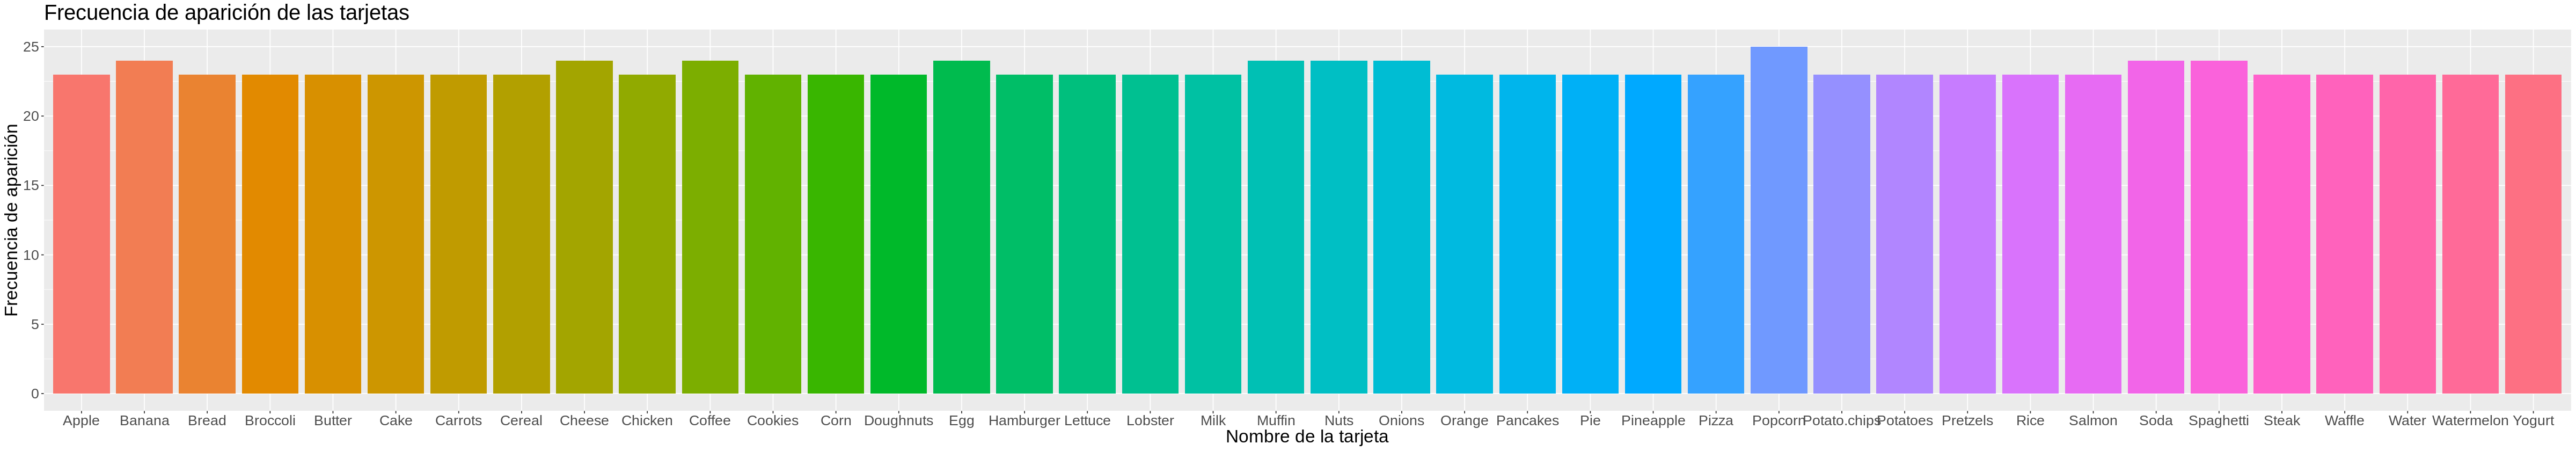

In [ ]:
options(repr.plot.width=40, repr.plot.height=7)

ggplot(data=frequency_appearence_data, aes(x=Target, y=Frequency, fill=Target)) +
  geom_bar(stat="Identity", show.legend=FALSE) +
  labs(x='Nombre de la tarjeta', y='Frecuencia de aparición', title='Frecuencia de aparición de las tarjetas') +
  theme(text=element_text(size=20))

El objetivo de este primer gŕafico es ver la frequencia de aparición de las distintas tarjetas, luego para ello, se ha utilizado un gráfico de barras.

Para conseguir dicha gráfica, primero se ha tenido que realizar una transformación en los datos que ha constado de varios pasos:
* Eliminar la columna "Category" del conjunto de datos
* Mediante un bucle obtener una lista del sumatorio de cada columna númerica
* Creación de un Dataframe donde la primera columna son los nombres de las tarjetas y la segunda columna la frecuencia de aparición

Tras ello se ha podido realizar la mencionada gráfica, dando como resultado que la amplia mayoría de las tarjetas tienen una frecuencia de aparición de 24, lo cual, cuadra con lo que se esperaría dada la dinámica del funcionamiento del Card Sorting y su número de participantes (24). 

In [ ]:
target_numeric_data <- sapply(target_data, as.numeric)

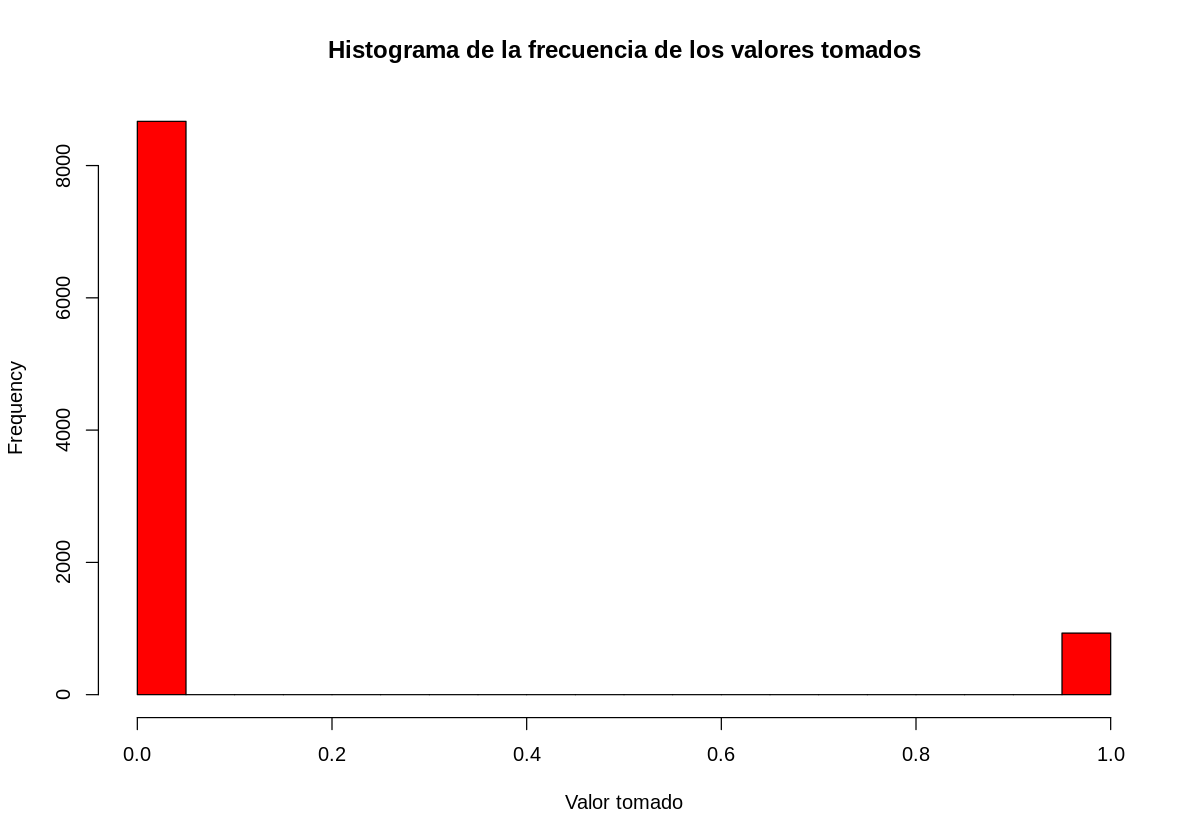

In [ ]:
options(repr.plot.width=10, repr.plot.height=7)

hist(target_numeric_data, xlab="Valor tomado", col="red", main="Histograma de la frecuencia de los valores tomados")

El objetivo del segundo gráfico es ver los valores que toman las distintas filas y su respectiva frecuencia.

De tal forma, se ha podido comprobar que los valores utilizados son: 1 en caso de que la categoría utilizada por el usuario coincida con la tarjeta y 0 en caso contrario. Como era de esperar además, hay una amplia diferencia entre la frecuencia de 0s y la de 1s. 

## **4. Matriz de similitud de tarjetas**

In [ ]:
distancias <- as.matrix(dist(t(target_numeric_data), method="euclidean"))

head(distancias)

,Carrots,Apple,Banana,Bread,Broccoli,Butter,Cake,Cereal,Cheese,Chicken,⋯,Pretzels,Rice,Salmon,Soda,Spaghetti,Steak,Waffle,Water,Watermelon,Yogurt
Carrots,0.000000,5.656854,5.744563,6.782330,1.414214,6.782330,6.782330,6.782330,6.855655,6.782330,⋯,6.782330,6.164414,6.782330,6.855655,6.855655,6.782330,6.782330,6.782330,5.656854,6.782330
Apple,5.656854,0.000000,1.732051,6.782330,5.656854,6.782330,6.782330,6.782330,6.855655,6.782330,⋯,6.782330,6.633250,6.782330,6.855655,6.855655,6.782330,6.782330,6.782330,1.414214,6.782330
Banana,5.744563,1.732051,0.000000,6.855655,5.744563,6.855655,6.855655,6.855655,6.782330,6.855655,⋯,6.855655,6.708204,6.855655,6.928203,6.928203,6.855655,6.855655,6.855655,1.732051,6.855655
Bread,6.782330,6.782330,6.855655,0.000000,6.782330,6.324555,6.164414,4.242641,6.708204,6.782330,⋯,6.000000,4.242641,6.782330,6.855655,5.385165,6.782330,5.099020,6.782330,6.782330,6.324555
Broccoli,1.414214,5.656854,5.744563,6.782330,0.000000,6.782330,6.782330,6.782330,6.855655,6.782330,⋯,6.782330,6.164414,6.782330,6.855655,6.855655,6.782330,6.782330,6.782330,5.656854,6.782330
Butter,6.782330,6.782330,6.855655,6.324555,6.782330,0.000000,6.633250,6.633250,3.872983,6.782330,⋯,6.480741,6.633250,6.782330,6.855655,6.855655,6.782330,6.480741,6.782330,6.782330,4.690416


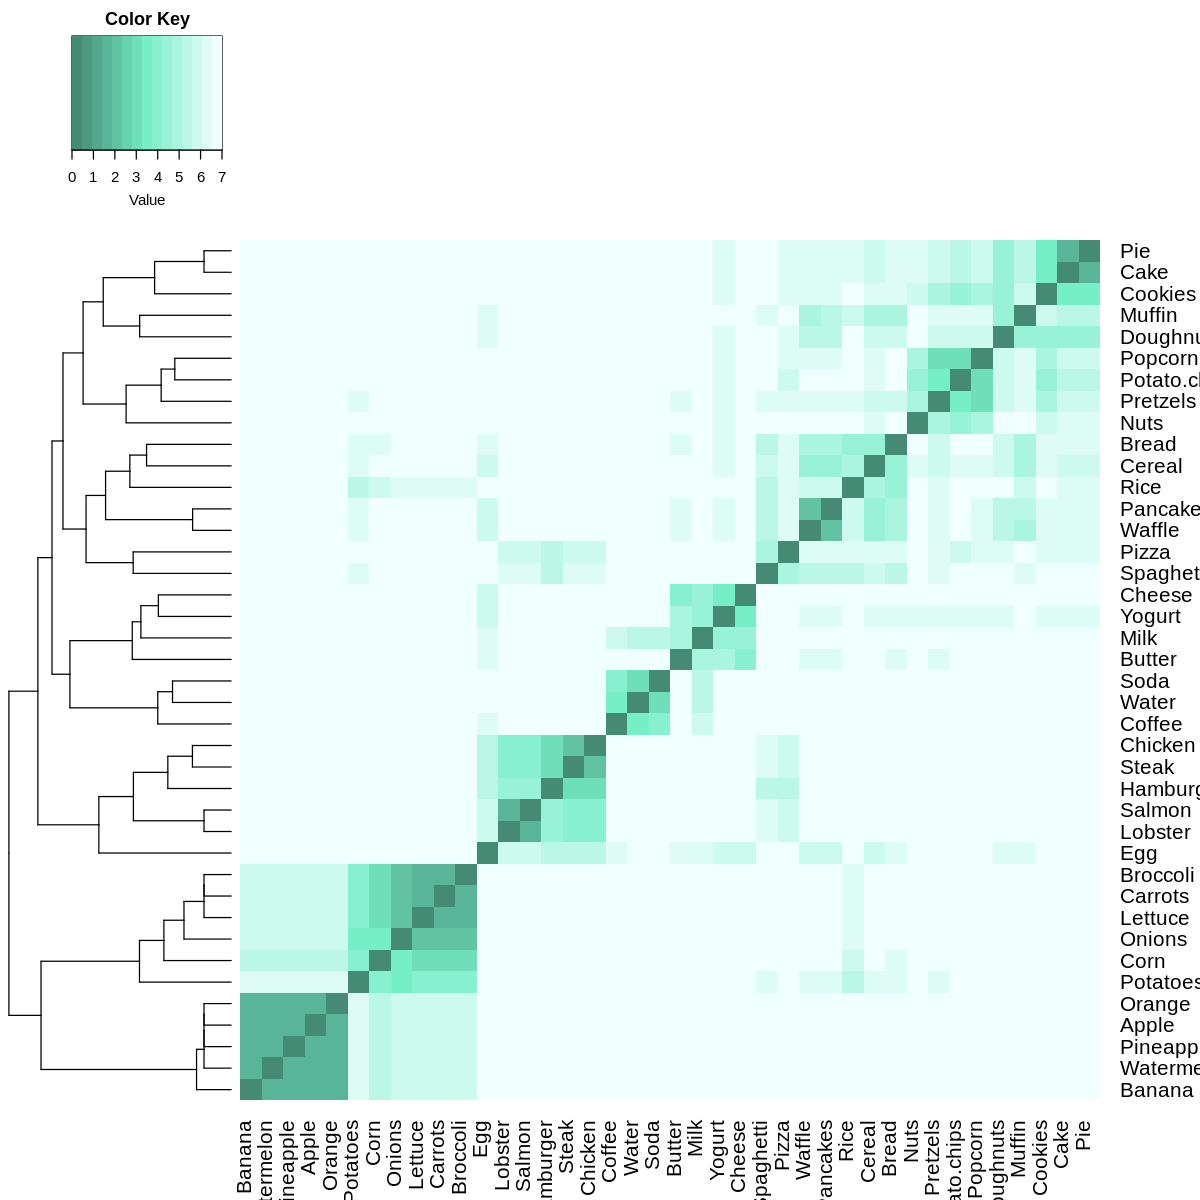

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

heatmap.2(distancias, symkey=FALSE, density.info="none",
          trace="none", dendrogram="row",
          col = colorRampPalette(c("aquamarine4","aquamarine2","azure")),
          keysize=1, cexRow = 1.25, cexCol=1.25)

Para hacer la matriz de similitud de tarjetas se ha elegido la representación gráfica que combina el dendograma con un mapa de calor, luego para ello se ha tenido que realizar el cálculo de la distancia euclídea de cada una de las tarjetas con respecto al resto.  

De tal forma, se puede ver a simple vista qué tarjetas son las que más relcionadas están entre sí. Estas son:
* Banana, Watermelon, Pineapple, Apple y Oranges
* Lettuce, Carrots y Broccoli
* Salmon y Lobster
* Pancake y Waffle
* Pie y Cake


## **5. Grafo de las relaciones entre las tarjetas**

In [ ]:
options(repr.plot.width=15, repr.plot.height=15)

qgraph(1/distancias, layout="spring", vsize=6, theme='Hollywood')

Output hidden; open in https://colab.research.google.com to view.

Mediante la utilización del grafo se confirman las relaciones entre tarjetas anteriormente mencionadas de una forma todavía más clara.

Para su obtención se ha utilizado la inversa de las distancias de forma que haya una relación inversamente proporcional, es decir, a menor distancia mayor relación entre tarjetas.

## **6. Conclusión**

Las tarjetas más relacionadas entre sí, tienen sentido a nivel semántico, ya que pueden agruparse en un dominio concreto con relativa facilidad:
* Banana, Watermelon, Pineapple, Apple y Oranges => **Frutas**
* Lettuce, Carrots y Broccoli => **Verduras**
* Salmon y Lobster => **Pescado**
* Pancake y Waffle => **Merienda**
* Pie y Cake => **Postre**